# k-Nearest Neighbors

In this notebook, we briefly introduce the k-NN model, then apply it on the penguins dataset.

# Introduction

The K-Nearest Neighbors (KNN) algorithm is a machine learning model in which a specified number of neighbors (k) are calculated to determine the classification of the feature vector in question. KNN can be use for both classification and regression tasks. This method was first developed by Evelyn Fix and Joseph Hodges in 1951. In classification, a vote is taken amongst the neighbors, and the classification with the highest vote wins. In regression, the average of the k-neighbors is taken as the predicted value of the feature vector. In the case where k=1, the classification or value of the closest neighbor becomes the classification or value of the feature vector.

KNN works by assigning a (preferably large) training set to the algorithm to act as a lookup table. As such, there is not training time or calculations. Once the training data is assigned, the model will use it as a reference for future data. To calculate the k-neighbors, the algorithm must calculate the distance between the input data and reference data. This can cause an issue if the number of features and training set are large because a distance must be calculated to all reference points to determine the closest neighbors. The computational complexity can be enormous.

### Algorithm 
*k* is a pre-defined constant, and for
* classification tasks.
An unlabeled data point is classified by assigning the label which is most frequent among the *k* training samples nearest to that query point.

* regression tasks.
An unlabeled data point is predicted by averaging the values among the k training samples nearest to that query point. 

More formally, k-nearest-neighbor methods use those observations in the training set $T$ closest in input space to x to form $\hat{y}$. Specifically, the k-nearest neighbor fit for $\hat{y}$ is defined as follows:

$$\hat{y} = \frac{1}{k} \sum_{x_i \in N_k(x)}{x_i}$$

where $N_k(x)$ is the neighborhood of $x$ defined by the $k$ closest points $x_i$ in the training sample. Closeness implies a metric, which for the moment Euclidean distance is the most commonly-used distance. So, in words, we find the k observations with $x_i$ closest to $x$ in input space, and average their responses. 

For classification problems, labels are binary coded so $\hat{y}$ is the proportion of the class of '1', and it represents a majority vote in the neighborhood. For regression problems, labels are numeric so $\hat{y}$ is the average of neighborhoods.

For our distance measure, we will choose the **Euclidean distance** defined by the following equation:

$$
d(p, q) = \sqrt{(p - q)^{T} (p - q)}
$$

Notice that the neighbors are taken from known data set, it can be thought of as the training data set for the algorithm, but in fact no explicit training step is required.

# Implementation


Euclidean distance Implementation

In [1]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

With our distance function, we are now ready to write a function to compute the -nearest neighbors to a given point

In [2]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

When we we have a function to compute the k-nearest neighbors to a point, we can now write a function to predict a target label. 

In [3]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

Function to compute the classification error

In [4]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

# Application

After showing the code part of the linear regression algorithm, we will implement the code into the dataset. The dataset is palmer penguins, we want to use KNN algorithms to distinguish the three penguin species, Adelie,Chinstrap, and Gentoo by bill length and bill depth.

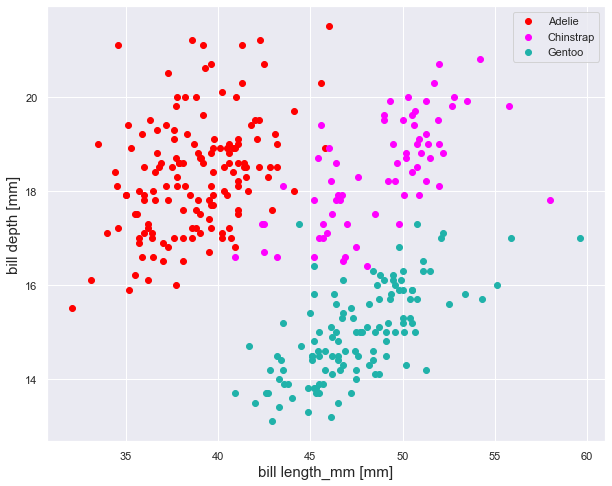

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("./Dataset/palmer_penguins.csv")

# Plot the data
species = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for specie, color in zip(species, colors):
    temp_df = df[df.species == specie]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = specie, 
               )
    
ax.set_xlabel("bill length_mm [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm]", fontsize = 15)
ax.legend()
plt.show()

We creat a training set and testing set using train_test_split function in sklearn package.

In [6]:
from sklearn.model_selection import train_test_split

X = df[["bill_length_mm",
          "bill_depth_mm"]].to_numpy()

y = df["species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

Test our distance function

In [7]:
print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 9.265527507918797


With our distance function, we are now ready to write a function to compute the $k$-nearest neighbors to a given point. This is done in the code cell below. 

Test the k_nearest_neighbors function

In [8]:
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([50.9, 17.9]), 'Chinstrap', 0.4999999999999993],
 [array([51.5, 18.7]), 'Chinstrap', 0.5385164807134515],
 [array([50.8, 18.5]), 'Chinstrap', 0.5830951894845304],
 [array([52. , 18.1]), 'Chinstrap', 0.70710678118655],
 [array([50.8, 19. ]), 'Chinstrap', 0.943398113205661]]

Show the true label 

In [9]:
y_test[-1]

'Chinstrap'

Test our function 

In [10]:
KNN_Predict(X_test[-1], X_train, y_train, 5)

'Chinstrap'

Classification error result

In [11]:
# Test our function
classification_error(X_test, y_test, X_train, y_train, 7)

0.045454545454545456

## Choosing the right value for K
To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.

Here are some things to keep in mind:

1. As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green.
2. Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.
3. In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.

### Then how to select the optimal K value?
* There are no pre-defined statistical methods to find the most favorable value of K.
* Initialize a random K value and start computing.
* Choosing a small value of K leads to unstable decision boundaries.
* The substantial K value is better for classification as it leads to smoothening the decision boundaries.
* Derive a plot between error rate and K denoting values in a defined range. Choose the K value having the minimum error rate. 


In [12]:
possible_k = [k for k in range(3, 26, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

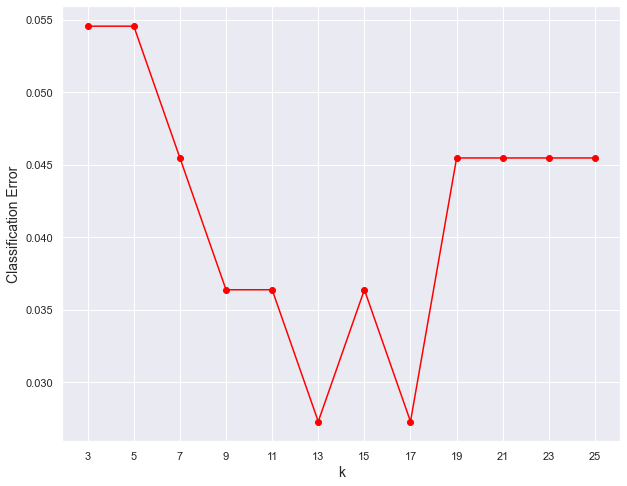

In [13]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

As shown in the graph, k = 13 is a proper value

## In the following part, we will use the Scikit-Learn to realize KNN Algorithm

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set Theme
sns.set_theme()

# Load penguins data 

df1 = pd.read_csv("./Dataset/palmer_penguins.csv")

# Plot the data
species = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]



# Grab Adelie and Chinstrap flowers
df1 = df1[df1["species"] != "Gentoo"]

# Create feature matrix
X = df1[["bill_length_mm","bill_depth_mm"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "Chinstrap":
        return 0
    else:
        return 1
            
# Create target value array
y = df1["species"].map(make_labels).to_numpy()

# Create a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 13)

# Instantiate a KNN classifier 
clf = KNeighborsClassifier(n_neighbors = 13)

In [15]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

Make prediction and compare the result of prediction and actual data

In [16]:
print(f"clf.predict(X_test) = {clf.predict(X_test)} \n")
y_pred = clf.predict(X_test)

print(f"y_pred == y_test = {y_pred == y_test} \n")

print(f"sum(y_pred == y_test)/len(y_test) = {sum(y_pred == y_test)/len(y_test)}")

clf.predict(X_test) = [1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1
 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1] 

y_pred == y_test = [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True] 

sum(y_pred == y_test)/len(y_test) = 1.0


Calculate the mean accuracy on the given test data and labels.

In [17]:
# Calculate the accuracy
clf.score(X_test, y_test)

1.0

Visualize the decision boundary generated by our trained classifier 

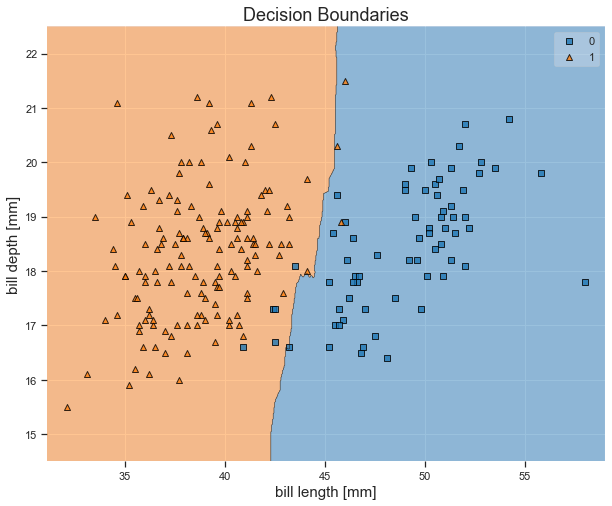

In [18]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

## The Confusion Matrix 
A **confusion matrix** is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

> The confusion matrix shows the ways in which your classification model is confused when it makes predictions.

It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made. It is this breakdown that overcomes the limitation of using classification accuracy alone.

We will compute the confusion matrix in the following part to exam the performance of our classification model.

cf_matrix = [[23  0]
 [ 0 48]] 



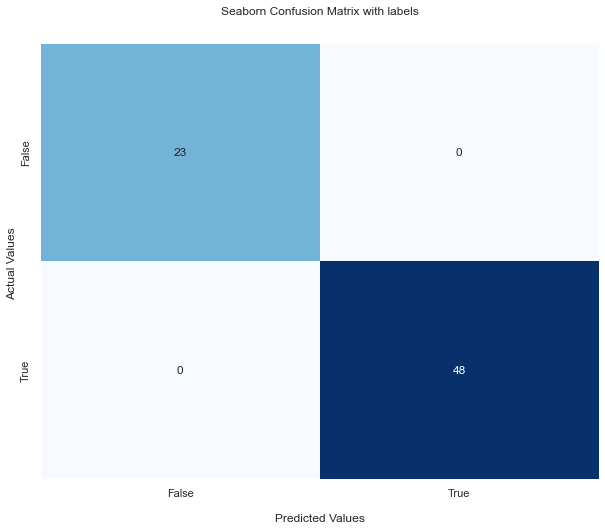

In [19]:
from sklearn.metrics import confusion_matrix

# Define the model
clf = KNeighborsClassifier(n_neighbors = 13)

# Fit the model
clf.fit(X_train,y_train)

# Make predictions on testing data
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()


Due to our problem is a binary classification problem, where we are often looking to discriminate between observations with a specific outcome, from normal observations. The binary classification problem has three index to evaluate the performance of model, which are **precision**, **recall** and **$F_1$-score**.

**Precision** ($P$) is defined as the number of true positives ($T_p$) over the number of true positives plus the number of false positives ($F_p$):
$$
P = \frac{T_p}{T_p + F_p}
$$

**Recall** ($R$) is defined as the number of true positives ($T_P$) over the number of true positives plus the number of false negatives ($F_n$):
$$
R = \frac{T_p}{T_p + F_n}
$$

There quantities are related to the **$F_1$-score**, which is defined as the harmonic mean of precision and recall:
$$
F_1 = 2 \frac{P\times R}{P+R}
$$

We will add the three index as an assessment criteria to our classification model. These three index can be created by calling ```sklearn.metrics.classification_report()``` function.

In [20]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        48

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71



In the next part we will also apply the logistic regresssion algorithms and multilayer perceptron classifier algorithms to the data and we will show the decision boundaries, confusion matrix and classification report of the two algorithms. Later, we will compare which model perform well in this classification task.

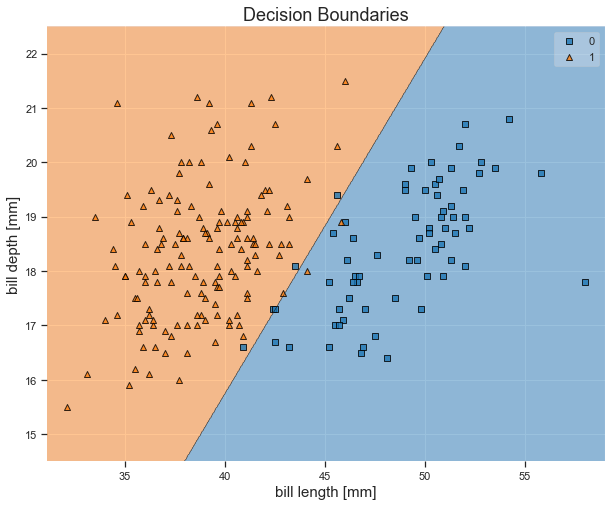

In [21]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression(max_iter = 10_000)
clf2.fit(X_train, y_train)

log_y_pred = clf2.predict(X_test)

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf2)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()

cf_matrix = [[22  1]
 [ 0 48]] 



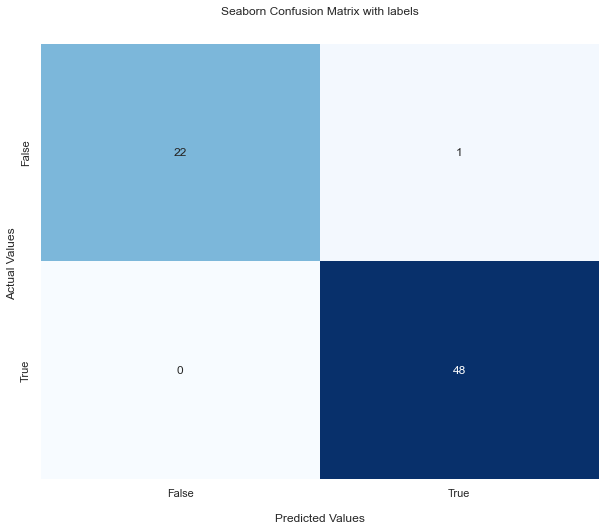

In [22]:
# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, log_y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [23]:
#Checking performance our model with classification report.
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.98      1.00      0.99        48

    accuracy                           0.99        71
   macro avg       0.99      0.98      0.98        71
weighted avg       0.99      0.99      0.99        71



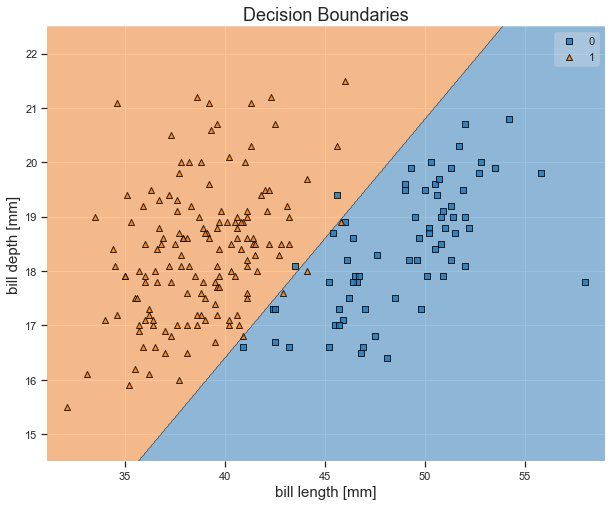

In [24]:
from sklearn.neural_network import MLPClassifier
clf3 = MLPClassifier(solver='lbfgs', alpha= 0.33,
                   hidden_layer_sizes=(120, 120), random_state=1, max_iter = 50_000)

clf3.fit(X_train, y_train)
net_y_pred = clf3.predict(X_test)

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf3)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()


cf_matrix = [[22  1]
 [ 0 48]] 



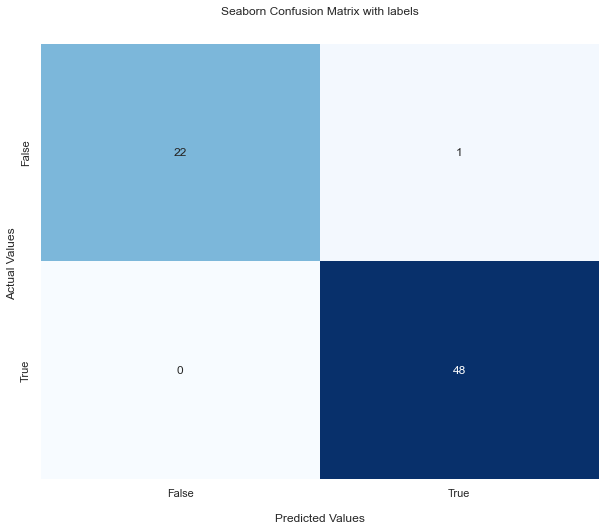

In [25]:
# Calculate the confusion matrix
cf_matrix = confusion_matrix(y_test, net_y_pred)

# Print the confusion matrix 
print(f"cf_matrix = {cf_matrix} \n")

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [26]:
#Checking performance our model with classification report.
print(classification_report(y_test, net_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.98      1.00      0.99        48

    accuracy                           0.99        71
   macro avg       0.99      0.98      0.98        71
weighted avg       0.99      0.99      0.99        71



# Conclusion

It can be seen KNN algorithms has a good performance in the classification task compared to logistic regresssion algorithms and multilayer perceptron classifier algorithms. KNN algorithms has higher classification report score and better confusion matrix result. As to the decision boundary, KNN algorithms has curve boundary, this larger freedom of degree can improve model classification performance.